## Import stuff

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
from mysticetus.model_driven_reco import *
from mysticetus.model_driven_reco import dist_model_grating_1D                   as dist_model
from mysticetus.model_driven_reco import meas_model_basic_far_field_intensity_1D as meas_model
from mysticetus.model_driven_reco import make_objective_1D                       as make_objective

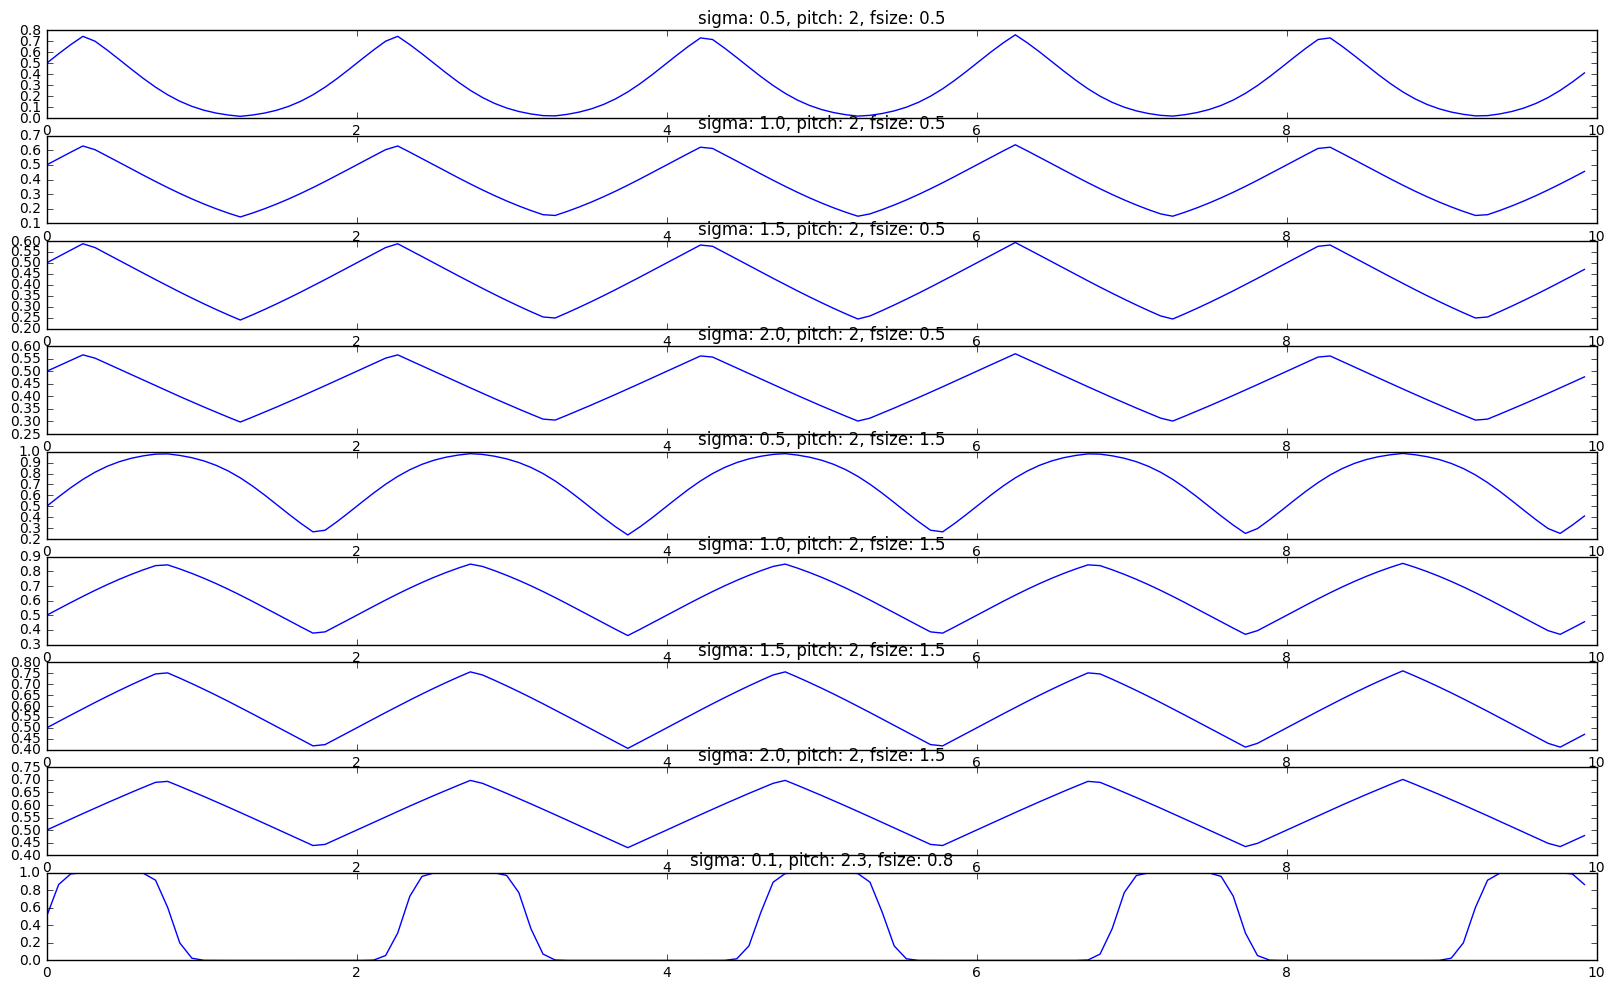

In [3]:
# Define definition domain
xmin  = 0
xmax  = 10
xres  = 128
x     = np.linspace(xmin, xmax, xres, endpoint=False)

psets = []
psets.append({'sigma':0.5, 'pitch':2, 'fsize':0.5})
psets.append({'sigma':1.0, 'pitch':2, 'fsize':0.5})
psets.append({'sigma':1.5, 'pitch':2, 'fsize':0.5})
psets.append({'sigma':2.0, 'pitch':2, 'fsize':0.5})
psets.append({'sigma':0.5, 'pitch':2, 'fsize':1.5})
psets.append({'sigma':1.0, 'pitch':2, 'fsize':1.5})
psets.append({'sigma':1.5, 'pitch':2, 'fsize':1.5})
psets.append({'sigma':2.0, 'pitch':2, 'fsize':1.5})
psets.append({'sigma':0.1, 'pitch':2.3, 'fsize':0.8})

fig = plt.figure(figsize=(20, 12))
i = 0
for pset in psets:
    fig.add_subplot(len(psets), 1, i+1)
    f = dist_model(pset['sigma'], pset['pitch'], pset['fsize'], x)
    plt.plot(x, f)
    plt.title('sigma: {}, pitch: {}, fsize: {}'.format(pset['sigma'], pset['pitch'], pset['fsize']))
    i += 1

In [4]:
#basinhopping?

19.0835069418
0.0915719751591
(array([12]), array([23]), array([1]))
sigma: 1.2171875, pitch: 2.3150390625, fsize: 0.1193359375
0.0915719751591


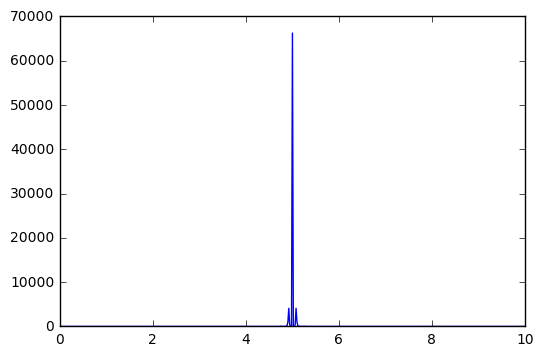

In [5]:
# Synthesize measurement
xmin      = 0
xmax      = 10
xres      = 512
x         = np.linspace(xmin, xmax, xres, endpoint=False)

true_p    = {'sigma':0.8, 'pitch':2.3, 'fsize':1.1}

true_dist = dist_model(true_p['sigma'], true_p['pitch'], true_p['fsize'], x)
meas      = meas_model_basic_far_field_intensity_1D(true_dist)
plt.plot(x, meas)


# Define parameter scan domain
Dx        = domain_scales(x)['Dx']
dx        = domain_scales(x)['dx']

sigmamin  = dx
sigmamax  = Dx
sigmares  = 100
sigma     = np.linspace(sigmamin, sigmamax, sigmares, endpoint=False)

pitchmin  = dx
pitchmax  = Dx
pitchres  = 100
pitch     = np.linspace(pitchmin, pitchmax, pitchres, endpoint=False)

fsizemin  = dx
fsizemax  = Dx
fsizeres  = 100
fsize     = np.linspace(fsizemin, fsizemax, fsizeres, endpoint=False)

#sss, ppp, fff\
#          = np.meshgrid(sigma, pitch, fsize)


# 
fct       = make_objective_1D(x, meas)
vals      = np.zeros(shape=(len(sigma), len(pitch), len(fsize)))

for i in range(len(sigma)):
    s = sigma[i]
    for j in range(len(pitch)):
        p = pitch[j]
        for k in range(len(fsize)):
            f = fsize[k]
            vals[i, j, k] = fct([s, p, f])

print(np.max(vals))
print(np.min(vals))
where = np.where(vals==np.min(vals))
print(np.where(vals==np.min(vals)))
opt_s, opt_p, opt_f = sigma[where[0][0]], pitch[where[1][0]], fsize[where[2][0]]
print('sigma: {}, pitch: {}, fsize: {}'.format(opt_s, opt_p, opt_f))
print(fct([opt_s, opt_p, opt_f]))

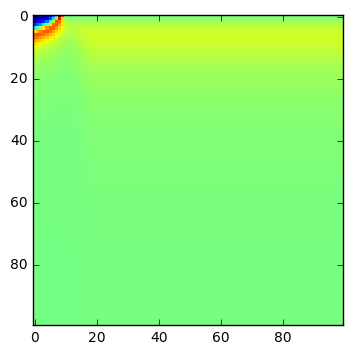

In [6]:
plt.imshow(1/vals[:,10,:], interpolation='nearest')

In [7]:
print(np.log(100)/np.log(10))

2.0


In [8]:
basinhopping?